# Convolutional neural network with Keras

In this demo, we will train and test a CNN model on the CIFAR10 dataset using Keras.

# Set the seed
For consistent results we can set the seed, although setting the seed will not cause the same results from two models with the same parameters.

In [2]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


# basic random seed
import os 
import random
import numpy as np 

DEFAULT_RANDOM_SEED = 2021

def seedBasic(seed=DEFAULT_RANDOM_SEED):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    
# tensorflow random seed 
import tensorflow as tf 
def seedTF(seed=DEFAULT_RANDOM_SEED):
    tf.random.set_seed(seed)
    
# torch random seed
import torch
def seedTorch(seed=DEFAULT_RANDOM_SEED):
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
      
# basic + tensorflow + torch 
def seedEverything(seed=DEFAULT_RANDOM_SEED):
    seedBasic(seed)
    seedTF(seed)
    seedTorch(seed)

seedEverything(1000)

## 1. Load dataset

The following code snippet will download the data, load it into memory, and convert pixel values to [0, 1]. This dataset contains 90 different animals with 60 images of each animal. approximately 40x90 images will be used to train, 10x90 for validation and 10x90 for test. Compared to other datasets data is scarce.

In [36]:
# Load the animal data
import kagglehub
from tensorflow.keras.preprocessing import image
from sklearn.model_selection import train_test_split

# Download latest version
path = kagglehub.dataset_download("puneet6060/intel-image-classification")
print("Path to dataset files:", path)

# Path to the images
dataset_dir = '/kaggle/input/intel-image-classification/seg_train/seg_train'

# Dataset
X_train_dataset, Y_train_labels = [], []
image_size = (150, 150)

labels = []
count = 0

# Load the images
for natural_scene_name in os.listdir(dataset_dir):
    label_number = count
    labels.append(natural_scene_name)
    natural_scene_name_path = os.path.join(dataset_dir, natural_scene_name)
    for img in os.listdir(natural_scene_name_path):
        img_path = os.path.join(natural_scene_name_path, img)
        img = image.load_img(img_path, target_size=image_size)   # Change target size - original size is 
        img_array = image.img_to_array(img) #/ 255.0  # Normalize the image
        X_train_dataset.append(img_array)
        Y_train_labels.append(count)
    #if count == 9:
    #    break        
    count = count+1


X_train_dataset, Y_train_labels = np.asarray(X_train_dataset), np.expand_dims(np.asarray(Y_train_labels), axis=1)

#X_train_temp,X_test,Y_train_temp,Y_test = train_test_split(X_dataset, Y_labels, test_size = 1/6, random_state=0)    # Note could have poor distributed in test data- check
X_train,X_validation,Y_train,Y_validation = train_test_split(X_train_dataset, Y_train_labels, test_size = 1/7, random_state=1)

# Convert pixel values data type to float32
X_train = X_train.astype('float32')
#X_test  = X_test.astype('float32')
X_validation = X_validation.astype('float32')

# Calculate the mean and standard deviation of the training images
import numpy as np
mean = np.mean(X_train)
std  = np.std(X_train)

# Normalize the data
# The tiny value 1e-7 is added to prevent division by zero
X_train = (X_train-mean)/(std+1e-7)
#X_test  = (X_test-mean) /(std+1e-7)
X_validation = (X_validation-mean)/(std+1e-7)





#if os.path.exists(class_dir):
#for class_name in target_classes:
#if os.path.isfile(full_path2): # and img_name.lower().endswith(valid_extensions):


print(X_train.shape, Y_train.shape)
print(X_validation.shape, Y_validation.shape)
print(X_test.shape, Y_test.shape)



X_train_dataset
np.asarray(Y_train_labels)
Y_train_labels = np.expand_dims(np.asarray(Y_train_labels), axis=1)
X_train_
np.asarray(X_train_dataset[24:])
#14034
print(np.asarray(X_train_dataset[21:23]))
print(np.asarray(X_train_dataset[22:24]))
print(X_train_dataset[20:22])
print("****")
print(X_train_dataset[22:24])
X_train_dataset[9211].shape == (150,150,3)

list1 = []
list2 = []
#np.where(X_train_dataset == )
for i in range(0,len(X_train_dataset),1):
    list1.append(X_train_dataset[i].shape)
    list2.append((150,150,3))

sum(np.asarray(list1) == np.asarray(list2))


(12029, 150, 150, 3) (12029, 6)
(2005, 150, 150, 3) (2005, 6)
(3000, 150, 150, 3) (3000, 6)


In [21]:
dataset_dir2 = '/kaggle/input/intel-image-classification/seg_test/seg_test'

# Dataset
X_test_dataset, Y_test_labels = [], []
image_size = (150, 150)

labels2 = []
count = 0

# Load the images
for natural_scene_name in os.listdir(dataset_dir2):
    label2_number = count
    labels2.append(natural_scene_name)
    natural_scene_name_path = os.path.join(dataset_dir2, natural_scene_name)
    for img in os.listdir(natural_scene_name_path):
        img_path = os.path.join(natural_scene_name_path, img)
        img = image.load_img(img_path, target_size=image_size)   # Change target size - original size is 
        img_array = image.img_to_array(img) #/ 255.0  # Normalize the image
        X_test_dataset.append(img_array)
        Y_test_labels.append(count)
    #if count == 9:
    #    break        
    count = count+1


X_test, Y_test = np.asarray(X_test_dataset), np.expand_dims(np.asarray(Y_test_labels), axis=1)

#X_train_temp,X_test,Y_train_temp,Y_test = train_test_split(X_dataset, Y_labels, test_size = 1/6, random_state=0)    # Note could have poor distributed in test data- check
#X_train,X_validation,Y_train,Y_validation = train_test_split(X_train_dataset, Y_train_labels, test_size = 1/7, random_state=1)

# Convert pixel values data type to float32
#X_train = X_train.astype('float32')
X_test  = X_test.astype('float32')
#X_validation = X_validation.astype('float32')

# Calculate the mean and standard deviation of the training images
#import numpy as np
#mean = np.mean(X_train)
#std  = np.std(X_train)

# Normalize the data
# The tiny value 1e-7 is added to prevent division by zero
#X_train = (X_train-mean)/(std+1e-7)
X_test  = (X_test-mean) /(std+1e-7)
#X_validation = (X_validation-mean)/(std+1e-7)





#if os.path.exists(class_dir):
#for class_name in target_classes:
#if os.path.isfile(full_path2): # and img_name.lower().endswith(valid_extensions):


print(X_train.shape, Y_train.shape)
print(X_validation.shape, Y_validation.shape)
print(X_test.shape, Y_test.shape)



#X_train_dataset
#np.asarray(Y_train_labels)
#Y_train_labels = np.expand_dims(np.asarray(Y_train_labels), axis=1)
#X_train_
#np.asarray(X_train_dataset[24:])
##14034
#print(np.asarray(X_train_dataset[21:23]))
#print(np.asarray(X_train_dataset[22:24]))
#print(X_train_dataset[20:22])
#print("****")
#print(X_train_dataset[22:24])
#X_train_dataset[9211].shape == (150,150,3)

#list1 = []
#list2 = []
#np.where(X_train_dataset == )
#for i in range(0,len(X_train_dataset),1):
#    list1.append(X_train_dataset[i].shape)
#    list2.append((150,150,3))

(3000, 150, 150, 3) (3000, 1)


## 2. Show a few training examples and its label

In [22]:
import matplotlib.pyplot as plt

# Load an image
image_id = 0
plt.imshow(X_train[image_id])
plt.show()

print("Label is: ", labels[Y_train[image_id][0]])



Y_train2 = Y_train #Original arrays are needed later
Y_test2 = Y_test

#Note that some of the images have more than one animal e.g. 2 swans.


## 3. Convert label vectors into one-hot encodings
Converting into the outputs into one-hot encodings is necessasry for LeNet-5 and VGG-16, but not necessary for Resnet-50.

In [23]:
from tensorflow.keras.utils import to_categorical

num_classes = 6
Y_train = to_categorical(Y_train, num_classes)
Y_test = to_categorical(Y_test, num_classes)

Y_validation2 = Y_validation
Y_validation = to_categorical(Y_validation, num_classes)

print(Y_train.shape)#, Y_test.shape) #so now each label is a binary one hot encoding array - 
print(Y_validation.shape)

# Data Augmentation
To ensure the model generalizes well, we use data augmentation.

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

data_generator = ImageDataGenerator(
    rotation_range=15,             # Rotate images randomly by up to 15 degrees        
    width_shift_range=0.12,         # Shift images horizontally by up to 12% of their width    
    height_shift_range=0.12,      # Shift images vertically by up to 12% of their height   
    horizontal_flip=True,     # Randomly flip images horizontally    
    zoom_range=0.1,           # Zoom images in by up to 10%  
    brightness_range=[0.9,1.1],     # Change brightness by up to 10%
    shear_range=10,             # Shear intensity (shear angle in counter-clockwise direction in degrees)
    channel_shift_range=0.1,      # Channel shift intensity
)

## 4. Define or Import the CNN model

We choose the model that has been trained on the specified data set. This model has been saved and downloaded for consistent results.

In [13]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D, UpSampling2D, BatchNormalization

from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, LearningRateScheduler
from tqdm.keras import TqdmCallback


resnet_base_model = ResNet50(weights=None, 
                          include_top=False, 
                          classes = 6,
                          input_shape=(150, 150, 3),
                          pooling='avg',
                            )

resnet_model = Sequential()
#resnet_model.add(UpSampling2D(size=(7, 7)))
resnet_model.add(resnet_base_model)

#resnet_model.add(GlobalAveragePooling2D())  # Add a global average pooling layer

#resnet_model.add(Dropout(.25))

resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu')) # Add a fully connected layer
resnet_model.add(Dense(6, activation='softmax')) # Add the final output layer for classification


#resnet_model.summary()

## 4. Compile the model

In [14]:
resnet_model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
#Adam(learning_rate=0.001)
#resnet_base_model.summary()

## 5. Train the model

In [15]:
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=0.00001)
early_stopping = EarlyStopping(monitor='val_loss', patience=40, restore_best_weights=True, verbose=1)

history = resnet_model.fit(data_generator.flow(X_train, Y_train, batch_size=128), 
          epochs=60, 
          validation_data = (X_validation, Y_validation),
          callbacks=[reduce_lr, early_stopping]
         )


#X_train, Y_train,
#batch_size=128, #batch size originally 32

#data_generator.flow(X_train, y_train, batch_size=batch_size),

Epoch 1/60


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


94/94 ━━━━━━━━━━━━━━━━━━━━ 191s 1s/step - accuracy: 0.3523 - loss: 2.2718 - val_accuracy: 0.2095 - val_loss: 2.2194 - learning_rate: 0.0010
Epoch 2/60
94/94 ━━━━━━━━━━━━━━━━━━━━ 86s 844ms/step - accuracy: 0.5976 - loss: 0.9886 - val_accuracy: 0.2758 - val_loss: 2.6538 - learning_rate: 0.0010
Epoch 3/60
94/94 ━━━━━━━━━━━━━━━━━━━━ 86s 849ms/step - accuracy: 0.6753 - loss: 0.8417 - val_accuracy: 0.5900 - val_loss: 1.1505 - learning_rate: 0.0010
Epoch 4/60
94/94 ━━━━━━━━━━━━━━━━━━━━ 86s 847ms/step - accuracy: 0.7390 - loss: 0.7000 - val_accuracy: 0.7182 - val_loss: 0.7258 - learning_rate: 0.0010
Epoch 5/60
94/94 ━━━━━━━━━━━━━━━━━━━━ 85s 838ms/step - accuracy: 0.7780 - loss: 0.6209 - val_accuracy: 0.7312 - val_loss: 0.7459 - learning_rate: 0.0010
Epoch 6/60
94/94 ━━━━━━━━━━━━━━━━━━━━ 85s 840ms/step - accuracy: 0.8009 - loss: 0.5520 - val_accuracy: 0.7561 - val_loss: 0.6847 - learning_rate: 0.0010
Epoch 7/60
94/94 ━━━━━━━━━━━━━━━━━━━━ 86s 845ms/step - accuracy: 0.8075 - loss: 0.5260 - val_ac

# Save the model
Save the ResNet-50 model for later use

In [56]:
# Save the model
resnet_model.save('/kaggle/working/Natural_scenes_Animals_Data_Augmentation_ResNet50_60epoch.h5')

#reload best model

#best_val_model = resnet_model

#best_val_model.load_weights('/kaggle/working/weights.h5.keras')

## 1. Evaluate the trained model on test set

In [24]:
model = resnet_model

accuracy = model.evaluate(X_test, Y_test)[1]
print(accuracy)

94/94 ━━━━━━━━━━━━━━━━━━━━ 8s 80ms/step - accuracy: 0.8835 - loss: 0.3873
0.8886666893959045


# Show a Test Example and the Model predicition

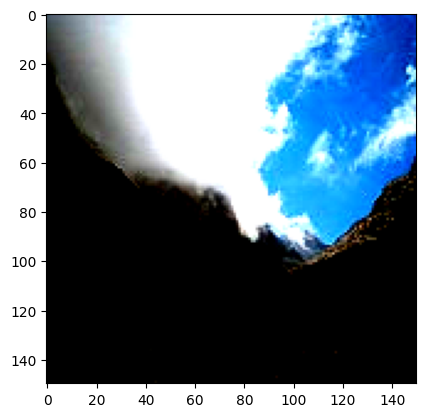

Test Index_Id:  1
True Label:  mountain
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Model label and associated confidence:  ['mountain', 0.71665365]


In [29]:
# Printing a test image and seeing what the model thinks it is

test_img_id = 1
test_image1 = X_test[test_img_id]
test_label1 = Y_test2[test_img_id]

plt.imshow(test_image1)  #Show image
plt.show()
print("Test Index_Id: ", test_img_id)
print("True Label: ", labels2[test_label1[0]])

# Print model predicted label and the models confidence                 
model_label_index = (model.predict(X_test[test_img_id:test_img_id+1])).argmax()  #Essentially just finding all probs for all classes then picking the index location of the maximum and its corresponding label
model_label_confidence = (model.predict(X_test[test_img_id:test_img_id+1])).max()


print("Model label and associated confidence: ", [labels2[model_label_index], model_label_confidence])


# Model Evaluation
Now that we have a model, we can begin to evaluate it. We begin by comparing the average confidence and accuracy

In [ ]:
#We now want the average confidence of the max confidence                                                 #This part is just an overlook, not specific to the research documents
a = model.predict(x_test[0:])                                                                     #All models predictions, with probablitly/confidence array for each test sample
b = a.max(axis = 1, keepdims = False)                                                             # All confidences of model prediction on test set (on its predicted/max label)
print("Average confidence of model over whole test set is:", b.mean())                            #Miscalibration, not ECE
print("Recall, the Accuracy on Test set was: ", accuracy)

#So on the test set the model is overconfident hence we need it to be recalibrated

# Define an Expected Calibration Error (ECE) function
The ECE is a common method to evaluate the performance of the model. Lower ECE's are better.

In [31]:
import numpy as np


def calculateECE(NumBins, X, Y, calibratedprobs = -999):
    """
    This function calculates the ECE on data provided.
    -NumBins is defined to be equal width intervals e.g. if NumBins = 10, 
                 then the intervals are: [0,0.1), [0,1,0.2) etc
    """

    if type(calibratedprobs) == type(np.array([0])):
        modelPredictX = calibratedprobs        
    else:
        modelPredictX = model.predict(X[0:])
        
    predictions_probs_arrays = modelPredictX                                               #All models predictions_probs, with probablitly/confidence array for each test sample
    prediction_prob_of_max = predictions_probs_arrays.max(axis = 1, keepdims = False)                   # All confidences of model prediction on test set (on its predicted/max label)
    
    #Calculating ECE by splitting into M equal width bins, e.g. could split into 10 bins, (0, 0.1],(0.1,0.2], ... (0.9,1]
    indices_for_each_Bm = [np.array(np.where((prediction_prob_of_max>i) & (prediction_prob_of_max<= i + (1/NumBins)))[0]) for i in (np.linspace(0,1,NumBins+1))[0:-1]]   #-1 here?               #All indices for each confidence Bm interval from e.g. (0,0.1],(0.1,0.2], ..., (0.9,1] in here, each as its own list/array 
    labelType = (Y == modelPredictX.argmax(axis = 1, keepdims = True)).reshape(1,-1)[0]                      #All correct label predicts by model. (Array of whether the model predicts correctly or incorrectly for all the X_test data samples)
    label_type_for_each_Bm = [labelType[indices_for_each_Bm[count]] for count in range(0,NumBins,1)]                        #Whether the model was correct or incorrect for each sample now split by confidence Bm Interval

    #Calculate accuracy and confidence for each bin interval
    accuracy_for_each_Bm = [label_type_for_each_Bm[count].mean() for count in range(0,NumBins,1)]                  #Accuracy for each confidence Bm interval - acc(Bm)
    confidence_for_each_Bm = [prediction_prob_of_max[indices_for_each_Bm[count]].mean() for count in range(0,NumBins,1)]                  # Avg confidence for each Bm confidence interval - conf(Bm)

    #Put together to get the ECE
    temp = [abs(accuracy_for_each_Bm[count]-confidence_for_each_Bm[count])*len(indices_for_each_Bm[count]) for count in range(0,NumBins,1)]
    ECE = (1/len(Y)) * np.nansum(temp)


    # New MCE
    temp2 = [abs(accuracy_for_each_Bm[count]-confidence_for_each_Bm[count]) for count in range(0,NumBins,1)]
    MCE = np.nanmax(temp2)
    #print(accuracy_for_each_Bm)
    #print(confidence_for_each_Bm)
    #print(indices_for_each_Bm[9])
    #print(label)
    #print(temp2)
    #print(MCE)
    
    
    return ECE

#Example

ECE_specified_bins = calculateECE(10, X_test, Y_test2)  #IMPERATIVE TO USE Y_TEST2 HERE BECAUSE Y_TEST IS ONE HOT ENCODING #Genuine #Also don't rerun Y_test2 = command
print("ECE is:", ECE_specified_bins)

94/94 ━━━━━━━━━━━━━━━━━━━━ 9s 60ms/step
ECE is: 0.0469698543349902


<ipython-input-31-76903d8258f8>:25: RuntimeWarning: Mean of empty slice.
  accuracy_for_each_Bm = [label_type_for_each_Bm[count].mean() for count in range(0,NumBins,1)]                  #Accuracy for each confidence Bm interval - acc(Bm)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
<ipython-input-31-76903d8258f8>:26: RuntimeWarning: Mean of empty slice.
  confidence_for_each_Bm = [prediction_prob_of_max[indices_for_each_Bm[count]].mean() for count in range(0,NumBins,1)]                  # Avg confidence for each Bm confidence interval - conf(Bm)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


# Plot an accuracy vs confidence plot
To better understand if the model is generating correct confidences we will plot a confidence vs true accuracy plot and compare to the identity function. Note that the identity function (y=x) is the target.

94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step


<ipython-input-32-3afa62c00107>:15: RuntimeWarning: Mean of empty slice.
  accuracy_for_each_Bm = [label_type_for_each_Bm[count].mean() for count in range(0,NumBins,1)]  #acc(Bm)
<ipython-input-32-3afa62c00107>:16: RuntimeWarning: Mean of empty slice.
  confidence_for_each_Bm = [prediction_prob_of_max[indices_for_each_Bm[count]].mean() for count in range(0,NumBins,1)] #conf(Bm)


Text(0, 0.5, 'Accuracy')

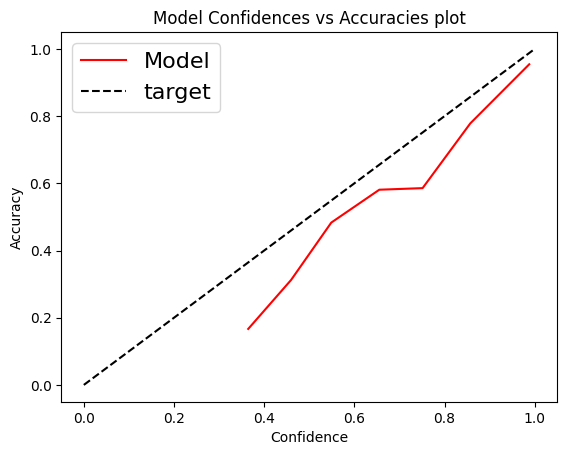

In [32]:
import numpy as np

#Calculating values for the plot
#We will split into 10 equal width bins
NumBins = 10
predictions_probs_arrays = model.predict(X_test[0:])
prediction_prob_of_max = predictions_probs_arrays.max(axis = 1, keepdims = False)
    

indices_for_each_Bm = [np.array(np.where((prediction_prob_of_max>i) & (prediction_prob_of_max<= i + (1/NumBins)))[0]) for i in (np.linspace(0,1,NumBins+1))[0:-1]]                  
labelType = (Y_test2 == model.predict(X_test).argmax(axis = 1, keepdims = True)).reshape(1,-1)[0]                      
label_type_for_each_Bm = [labelType[indices_for_each_Bm[count]] for count in range(0,NumBins,1)]                        

    #Calculate accuracy and confidence for each bin interval
accuracy_for_each_Bm = [label_type_for_each_Bm[count].mean() for count in range(0,NumBins,1)]  #acc(Bm)
confidence_for_each_Bm = [prediction_prob_of_max[indices_for_each_Bm[count]].mean() for count in range(0,NumBins,1)] #conf(Bm)

#Remove NaN values
acc_Bm_no_NaN = [val for val in accuracy_for_each_Bm if str(val) != 'nan']
conf_Bm_no_NaN = [val2 for val2 in confidence_for_each_Bm if str(val2) != 'nan']

#Plot confidence of model vs accuracy of model
plt.plot(conf_Bm_no_NaN, acc_Bm_no_NaN,color = 'red')
plt.plot([0,1], [0,1], color ='black', linestyle = '--', zorder = 0) #[x0,x1], [y0,y1]
plt.title("Model Confidences vs Accuracies plot")
plt.legend(('Model','target'),loc=0, prop={'size': 16})
plt.xlabel("Confidence")
plt.ylabel("Accuracy")



# Inductive Venn Abers using isotonic regressions
Now we will use the post probabilities to apply the post processing calibration technique Inductive Venn Abers. We will use the trained model as a base line. We will keep the calibration set, we will fit isotonic regression to both validation set + 1 test example where test example label is 0 and then once where it is 1. We will use this to find p_0 and p_1 for that example. We will begin with binary classification and find p_0 and p_1 in one onevsall case. We will do this for all the test examples.

In [42]:
import numpy as np
import tensorflow as tf
from sklearn.calibration import IsotonicRegression


# Calibration set is validation set

# Get test example:

model_preds = model.predict(X_validation) # Get confidences 
model_predict_test = model.predict(X_test) #  - Already ran above.


numclasses = 6

p0_biglist=[[] for k in range(0,numclasses,1)]
p1_biglist=[[] for k in range(0,numclasses,1)]
counter = 0

for k in range(0,numclasses,1):
    p0_list=[]   #lower probs of class 1
    p1_list=[]   #upper probs of class 1
    
    for i in range(0,len(X_test),1):


        #test example
        test_example = X_test[i:i+1]
        conf_test_example = model_predict_test[i].reshape(1,-1)
    
        #np.set_printoptions(suppress=True)
        #print(conf_test_example) 
    
    
        # Now fit Isotonic regression to validation set with example label, once with example and label 0, 
        # and once with example and label 1
    
    
    
        # Extract confidences for the each class
    
        #model_preds = model.predict(X_validation) # Get confidences
        model_preds_with_example = np.concatenate((model_preds, conf_test_example), axis=0)
        #model_preds_with_example #All validation confidences for all classes. This includes the test example
        model_preds_with_example_classk = model_preds_with_example[:,k]
    

        # Get indices of objects that belong to kth class
        y_val_classk_indices = np.where(Y_validation2.reshape(1,-1)[0] == (np.zeros(len(Y_validation))+k))

        # Put 1 in objects that belong to kth class
        y_val2 = np.zeros(len(Y_validation))
        y_val2[y_val_classk_indices] = 1

    
    
        y_val2_with0example = np.concatenate((y_val2, np.array([0])))
        y_val2_with1example = np.concatenate((y_val2, np.array([1])))
    
    
        # Upper and lower isotonic regressions
        #from sklearn.calibration import IsotonicRegression
    
        #1
        isotonic = IsotonicRegression(out_of_bounds='clip',
                                  y_min=model_preds_with_example_classk.min(), #check
                                  y_max=model_preds_with_example_classk.max())
        isotonic.fit(model_preds_with_example_classk, y_val2_with0example)
    
        isotonic_prob_p0 = isotonic.predict(conf_test_example[0]) #In here you should import the test confidences and change them here
    
        #2
        isotonic2 = IsotonicRegression(out_of_bounds='clip',
                                  y_min=model_preds_with_example_classk.min(), #check
                                  y_max=model_preds_with_example_classk.max())
        isotonic2.fit(model_preds_with_example_classk, y_val2_with1example)
    
        isotonic_prob_p1 = isotonic2.predict(conf_test_example[0]) #In here you should import the test confidences and change them here

    
        #Results for the one test example:
        p0_list.append(isotonic_prob_p0[k]) # Perhaps not the most efficient
        p1_list.append(isotonic_prob_p1[k])
        counter = counter+1
        if counter%1000 == 0:
            print(counter)
            #print(p0_list)

    p0_biglist[k] = p0_list
    p1_biglist[k] = p1_list

    


# This is IVAP instead of VA simple version
# Note for Venn Abers simple version, I can also use all of the training data! 
# i.e. - Venn abers simple version uses the train data in official publication by Vovk
#Isotonic regressions on a validation set


#For the whole k classes for all p_0 and p_1 (two for loops and a total of 200,000 isotonic regressions):
#Start: 15:05:30
#End: 15:13:10       - 7mins 40s

63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000


In [43]:
p0_bigarray = np.asarray(p0_biglist)
p1_bigarray = np.asarray(p1_biglist)

# Extract p's
p = p1_bigarray / (1-p0_bigarray+p1_bigarray)

#np.set_printoptions(suppress=True)
#print(p)

IVAP_Predict_X_test_non_nomralized = np.transpose(p)
row_sums = np.sum(IVAP_Predict_X_test_non_nomralized, axis=1)

# Normalize
IVAP_Predict_X_test = IVAP_Predict_X_test_non_nomralized / row_sums[:, np.newaxis]

#print(IVAP_Predict_X_test)
#(p1_bigarray-p0_bigarray).mean()

# Create a plot

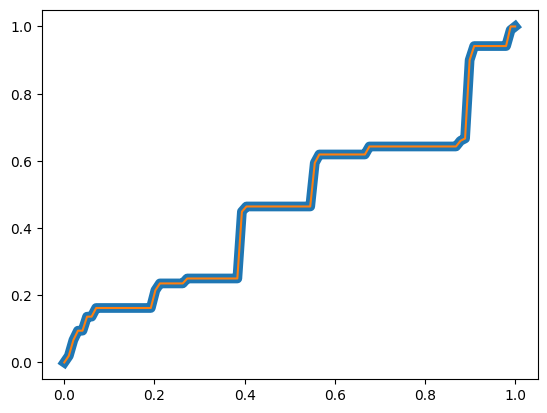

In [44]:
# Note that this is only for one test example
x_inputs = np.linspace(0,1,100)
lower = isotonic.predict(x_inputs) #In here you should import the test confidences and change them here
upper = isotonic2.predict(x_inputs)

import matplotlib.pyplot as plt
plt.plot(x_inputs, lower, linewidth=7.0)
plt.plot(x_inputs, upper)
plt.show()



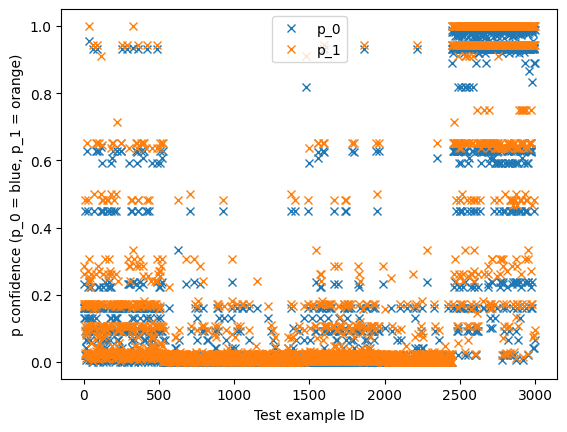

(3000,)

In [45]:
# A plot of p_0 vs p_1 for the final class only
x = range(0,len(p0_list))
plt.plot(x, p0_list, 'x')# color = 'red')
plt.plot(x, p1_list, 'x')
plt.legend(('p_0', 'p_1'), loc=0)
plt.xlabel("Test example ID")
plt.ylabel("p confidence (p_0 = blue, p_1 = orange)")
plt.show()
#p0_list

#Temp
np.set_printoptions(suppress=True)
p0_array = np.asarray(p0_list)
p1_array = np.asarray(p1_list)
(p1_array-p0_array).max()
p = (p1_array) 
p0_array.shape



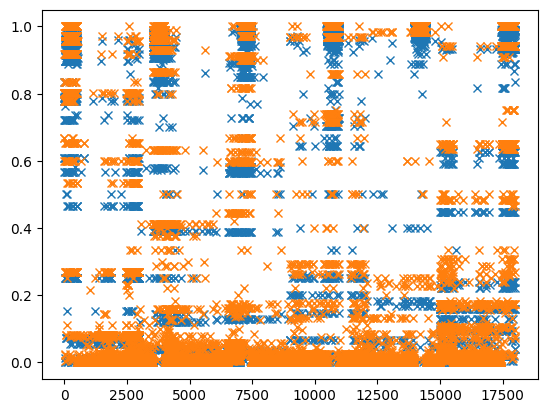

In [46]:
# A plot of p_0 vs p_1 for each class
x = range(0,len(p0_bigarray.reshape(1,-1)[0]))
plt.plot(x, p0_bigarray.reshape(1,-1)[0], 'x')#, color = 'red')
plt.plot(x, p1_bigarray.reshape(1,-1)[0], 'x')
plt.show()



## Isotonic Regression
We begin by getting test example

In [49]:
# Extract confidences for the each class
import numpy as np

numclasses = 6

y_val_indexes = [ [] for k in range(0,numclasses,1) ]
for i in range(0,len(Y_validation),1):
    y_val_indexes[Y_validation2[i][0]].append(i)


#model_preds = model.predict(X_validation)   #already defined in prev code block

#y_val_preds_classes = []
#y_val_preds_classes = [ [model_preds[y_val_indexes[i],i]] for i in range(0,numclasses,1)]


# Preparing
modelpreds = model_preds
modelpreds_0 = modelpreds[:,0]                   #MUST USE THE CORRECT ONES, NEED TO USE 1 PREDICTION OTHERWISE WILL GET STUCK AT HALF PROBABILITY!
model_preds_organised = [ [modelpreds[:,i]] for i in range(0,numclasses,1) ]
model_preds_organised = np.asarray(model_preds_organised)

y_true_organised_temp = [ np.zeros(len(Y_validation)) for i in range(0,numclasses,1) ]
y_true_organised = y_true_organised_temp
for i in range(0,numclasses,1):
    (y_true_organised[i])[y_val_indexes[i]] = 1



#model_test_preds = model.predict(X_test)
model_test_preds = model_predict_test   #defined in prev code block

model_test_preds_organised = [ [model_test_preds[:,i]] for i in range(0,numclasses,1) ]
model_test_preds_organised = np.asarray(model_test_preds_organised)




#Iso for each class k in a kvsALL array

from sklearn.calibration import IsotonicRegression

isotonic_probs_array = [ [] for k in range(0,numclasses,1) ]
for i in range(0, numclasses, 1):
    isotonic1 = IsotonicRegression(out_of_bounds='clip',
                              y_min=model_preds_organised[i][0].min(),
                              y_max=model_preds_organised[i][0].max())
    isotonic1.fit(model_preds_organised[i][0], np.reshape(y_true_organised[i], (-1)))
    isotonic_probs_array[i] = isotonic1.predict(model_test_preds_organised[i][0])





isotonic_probs_array = np.asarray(isotonic_probs_array)
class_non_normalized_confidences_array = np.transpose(isotonic_probs_array)

# Now normalise each row
row_sums = class_non_normalized_confidences_array.sum(axis=1)
class_confidences_array = class_non_normalized_confidences_array / row_sums[:, np.newaxis]




Iso_ECE = calculateECE(10, "X_test", Y_test2, class_confidences_array)
print("Post-Processing Isotonic Regression ECE (10 bins): ", Iso_ECE)
print("Recall the ECE (10 bins) on the original non calibrated model was: ", calculateECE(10, "X_test", Y_test2, model_test_preds))

print("Original confidences vs calibrated confidences:")
#print(model_test_preds)
#print(class_confidences_array)


print("----AND----")


# Max confidences
row_arg_max = class_confidences_array.argmax(axis=1) #SHOULD BE NORMALIZED BUT will always be SAME RESULTS 
print("Isotonic regression calibrated accuracy", (sum(Y_test2.reshape(-1,) == row_arg_max)) / (len(Y_test2)))
print("Recall original model accuracy: ", accuracy)



# IVAP ECE
print("IVAP ECE: ", calculateECE(10, "X_test", Y_test2, IVAP_Predict_X_test))

# Retest accuracy
row_arg_max2 = IVAP_Predict_X_test.argmax(axis=1)
print("IVAP calibrated accuracy", (sum(Y_test2.reshape(-1,) == row_arg_max2)) / (len(Y_test2))) # improved by +1



Post-Processing Isotonic Regression ECE (10 bins):  0.022059797863165493
Recall the ECE (10 bins) on the original non calibrated model was:  0.0469698543349902
Original confidences vs calibrated confidences:
----AND----
Isotonic regression calibrated accuracy 0.891
Recall original model accuracy:  0.8886666893959045
IVAP ECE:  0.01277322878440219
IVAP calibrated accuracy 0.8903333333333333


<ipython-input-31-76903d8258f8>:25: RuntimeWarning: Mean of empty slice.
  accuracy_for_each_Bm = [label_type_for_each_Bm[count].mean() for count in range(0,NumBins,1)]                  #Accuracy for each confidence Bm interval - acc(Bm)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
<ipython-input-31-76903d8258f8>:26: RuntimeWarning: Mean of empty slice.
  confidence_for_each_Bm = [prediction_prob_of_max[indices_for_each_Bm[count]].mean() for count in range(0,NumBins,1)]                  # Avg confidence for each Bm confidence interval - conf(Bm)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


# First identify indexes of each class in the validation set

In [ ]:
# Model is trained

# Calibration set is validation set
#


# Extract confidences for the each class
import numpy as np
numclasses = 10
y_val_indexes = [ [] for k in range(0,numclasses,1) ]
for i in range(0,len(Y_validation),1):
    y_val_indexes[Y_validation[i][0]].append(i)


model_preds = model.predict(X_validation)

y_val_preds_classes = []
y_val_preds_classes = [ [model_preds[y_val_indexes[i],i]] for i in range(0,numclasses,1)]


# Preparing
modelpreds = model_preds
modelpreds_0 = modelpreds[:,0]                   #MUST USE THE CORRECT ONES, NEED TO USE 1 PREDICTION OTHERWISE WILL GET STUCK AT HALF PROBABILITY!
model_preds_organised = [ [modelpreds[:,i]] for i in range(0,numclasses,1) ]
model_preds_organised = np.asarray(model_preds_organised)

y_true_organised_temp = [ np.zeros(len(Y_validation)) for i in range(0,numclasses,1) ]
y_true_organised = y_true_organised_temp
for i in range(0,numclasses,1):
    (y_true_organised[i])[y_val_indexes[i]] = 1



model_test_preds = model.predict(X_test)
model_test_preds_organised = [ [model_test_preds[:,i]] for i in range(0,numclasses,1) ]
model_test_preds_organised = np.asarray(model_test_preds_organised)




#Iso for each class k in a kvsALL array

from sklearn.calibration import IsotonicRegression
isotonic = IsotonicRegression(out_of_bounds='clip',
                              y_min=model_preds_organised[5][0].min(),
                              y_max=model_preds_organised[5][0].max())
isotonic.fit(model_preds_organised[5][0], np.reshape(y_true_organised[5], (-1)))

isotonic_probs = isotonic.predict(model_test_preds_organised[5][0]) #In here you should import the test confidences and change them here



isotonic_probs_array = [ [] for k in range(0,numclasses,1) ]
for i in range(0, numclasses, 1):
    isotonic1 = IsotonicRegression(out_of_bounds='clip',
                              y_min=model_preds_organised[i][0].min(),
                              y_max=model_preds_organised[i][0].max())
    isotonic1.fit(model_preds_organised[i][0], np.reshape(y_true_organised[i], (-1)))
    isotonic_probs_array[i] = isotonic1.predict(model_test_preds_organised[i][0])





isotonic_probs_array = np.asarray(isotonic_probs_array)
class_non_normalized_confidences_array = np.transpose(isotonic_probs_array)

# Now normalise each row
row_sums = class_non_normalized_confidences_array.sum(axis=1)
class_confidences_array = class_non_normalized_confidences_array / row_sums[:, np.newaxis]




Iso_ECE = calculateECE(10, "X_test", Y_test2, class_confidences_array)
print("Post-Processing Isotonic Regression ECE (10 bins): ", Iso_ECE)
print("Recall the ECE (10 bins) on the original non calibrated model was: ", calculateECE(10, "X_test", Y_test2, model_test_preds))

#print("Original confidences vs calibrated confidences:")
#print(model_test_preds)
#print(class_confidences_array)

print("----AND----")

# Max confidences
row_arg_max = class_confidences_array.argmax(axis=1) #SHOULD BE NORMALIZED BUT will always be SAME RESULTS
#print(row_arg_max[:20])
#print(Y_test2[:20])


#NICEEEEEE      
print("Isotonic regression calibrated accuracy", (sum(Y_test2.reshape(-1,) == row_arg_max)) / (len(Y_test2)))
print("Recall original model accuracy: ", accuracy)
# ACCURACY ALSO IMPROVED AND ECE IMPROVED




In [23]:
#indicestemp = np.where(row_arg_max==Y_test2.reshape([-1]))[0]
indices = np.where(row_arg_max != model_test_preds.argmax(axis=1))[0]
indices1 = np.where(row_arg_max[indices]==Y_test2.reshape(-1)[indices])[0]
indices2 = np.where(model_test_preds.argmax(axis=1)[indices]==Y_test2.reshape(-1)[indices])[0]
#print(row_arg_max)
#print(model_test_preds.argmax(axis=1))
print(len(indices1))
print(len(indices2))
#Y_test2.reshape([-1])
#print(row_arg_max[indices][32])
#print(model_test_preds.argmax(axis=1)[indices][32])
#indices

print(10000-len(indices))
np.set_printoptions(suppress=True)
print(model_test_preds[32])
print(class_confidences_array[32])

Y_test2[32]

126
124
9587
[0.00156204 0.00043191 0.01057618 0.00028223 0.3476876  0.00004159
 0.00910577 0.00040631 0.6287366  0.00116979]
[0.04944286 0.01222488 0.1299516  0.07099959 0.31851614 0.03187006
 0.07910858 0.02375369 0.2738374  0.0102953 ]


array([4], dtype=uint8)

# Isotonic example plot of the Iscotonic score function for a given confidence

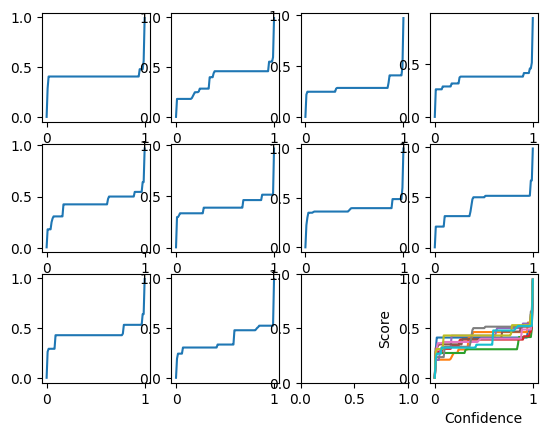

In [19]:
import matplotlib.pyplot as plt

a = np.linspace(0,1, 100)
fig, ax = plt.subplots(3, 4)

# Simple
for i in range(0, numclasses, 1):
    isotonic1 = IsotonicRegression(out_of_bounds='clip',
                              y_min=model_preds_organised[i][0].min(),
                              y_max=model_preds_organised[i][0].max())
    isotonic1.fit(model_preds_organised[i][0], np.reshape(y_true_organised[i], (-1)))

    b = isotonic1.predict(a) # k = 9th, kvsall isotonic fit
    #plt.plot(a, b, "-")
    ax[2, 3].plot(a, b, "-")

#plt.title("Model calibrated scores for each confidences plot for the k=9, kvsall isotonic fit ")
plt.xlabel("Confidence")
plt.ylabel("Score")
#plt.show()



# OR

# 9 subplots

for i in range(0, numclasses, 1):
    isotonic1 = IsotonicRegression(out_of_bounds='clip',
                              y_min=model_preds_organised[i][0].min(),
                              y_max=model_preds_organised[i][0].max())
    isotonic1.fit(model_preds_organised[i][0], np.reshape(y_true_organised[i], (-1)))

    b = isotonic1.predict(a) # k = 9th, kvsall isotonic fit
    ax[(i//4), i%4].plot(a, b, "-")


plt.show()


# Monotonic non-decreasing, all isotonic fits, would be like this, show all of them!

# Retest the Accuracy vs Confidence plot on the Isotonic calibrated model*
Same as before but now we can use the Isotonic calibrated confidences and model*

94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step


<ipython-input-50-b412ae5dedd1>:11: RuntimeWarning: Mean of empty slice.
  accuracy_for_each_Bm = [label_type_for_each_Bm[count].mean() for count in range(0,NumBins,1)]  #acc(Bm)
<ipython-input-50-b412ae5dedd1>:12: RuntimeWarning: Mean of empty slice.
  confidence_for_each_Bm = [prediction_prob_of_max[indices_for_each_Bm[count]].mean() for count in range(0,NumBins,1)] #conf(Bm)
<ipython-input-50-b412ae5dedd1>:31: RuntimeWarning: Mean of empty slice.
  accuracy_for_each_Bm = [label_type_for_each_Bm[count].mean() for count in range(0,NumBins,1)]                  #Accuracy for each confidence Bm interval - acc(Bm)
<ipython-input-50-b412ae5dedd1>:32: RuntimeWarning: Mean of empty slice.
  confidence_for_each_Bm = [prediction_prob_of_max[indices_for_each_Bm[count]].mean() for count in range(0,NumBins,1)]                  # Avg confidence for each Bm confidence interval - conf(Bm)
<ipython-input-50-b412ae5dedd1>:53: RuntimeWarning: Mean of empty slice.
  accuracy_for_each_Bm = [label_type_fo

Text(0, 0.5, 'Accuracy')

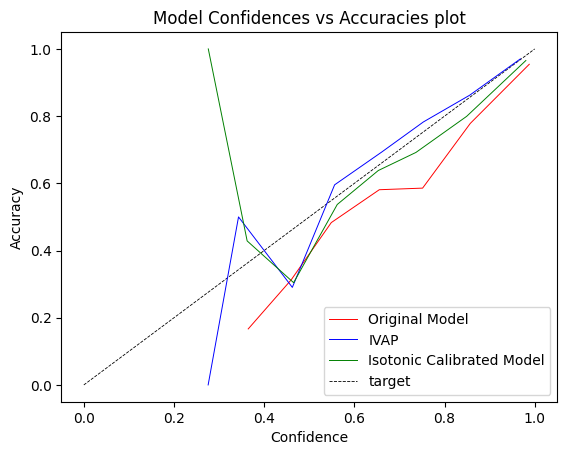

In [50]:
#Calculating values for the plot
#We will split into 10 equal width bins
NumBins = 10
#1
predictions_probs_arrays = model.predict(X_test[0:])
prediction_prob_of_max = predictions_probs_arrays.max(axis = 1, keepdims = False)
indices_for_each_Bm = [np.array(np.where((prediction_prob_of_max>i) & (prediction_prob_of_max<= i + (1/NumBins)))[0]) for i in (np.linspace(0,1,NumBins+1))[0:-1]]                  
labelType = (Y_test2 == model.predict(X_test).argmax(axis = 1, keepdims = True)).reshape(1,-1)[0]                      
label_type_for_each_Bm = [labelType[indices_for_each_Bm[count]] for count in range(0,NumBins,1)]                        
    #Calculate accuracy and confidence for each bin interval
accuracy_for_each_Bm = [label_type_for_each_Bm[count].mean() for count in range(0,NumBins,1)]  #acc(Bm)
confidence_for_each_Bm = [prediction_prob_of_max[indices_for_each_Bm[count]].mean() for count in range(0,NumBins,1)] #conf(Bm)
#Remove NaN values
acc_Bm_no_NaN1 = [val for val in accuracy_for_each_Bm if str(val) != 'nan']
conf_Bm_no_NaN1 = [val2 for val2 in confidence_for_each_Bm if str(val2) != 'nan']


#2 - isotonic
modelPredictX = class_confidences_array
Y = Y_test2
        
predictions_probs_arrays = modelPredictX                                               #All models predictions_probs, with probablitly/confidence array for each test sample
prediction_prob_of_max = predictions_probs_arrays.max(axis = 1, keepdims = False)                   # All confidences of model prediction on test set (on its predicted/max label)
    
#Calculating ECE by splitting into M equal width bins, e.g. could split into 10 bins, (0, 0.1],(0.1,0.2], ... (0.9,1]
indices_for_each_Bm = [np.array(np.where((prediction_prob_of_max>i) & (prediction_prob_of_max<= i + (1/NumBins)))[0]) for i in (np.linspace(0,1,NumBins+1))[0:-1]]   #-1 here?               #All indices for each confidence Bm interval from e.g. (0,0.1],(0.1,0.2], ..., (0.9,1] in here, each as its own list/array 
labelType = (Y == modelPredictX.argmax(axis = 1, keepdims = True)).reshape(1,-1)[0]                      #All correct label predicts by model. (Array of whether the model predicts correctly or incorrectly for all the X_test data samples)
label_type_for_each_Bm = [labelType[indices_for_each_Bm[count]] for count in range(0,NumBins,1)]                        #Whether the model was correct or incorrect for each sample now split by confidence Bm Interval

#Calculate accuracy and confidence for each bin interval
accuracy_for_each_Bm = [label_type_for_each_Bm[count].mean() for count in range(0,NumBins,1)]                  #Accuracy for each confidence Bm interval - acc(Bm)
confidence_for_each_Bm = [prediction_prob_of_max[indices_for_each_Bm[count]].mean() for count in range(0,NumBins,1)]                  # Avg confidence for each Bm confidence interval - conf(Bm)

#Remove NaN values
acc_Bm_no_NaN2 = [val for val in accuracy_for_each_Bm if str(val) != 'nan'] 
conf_Bm_no_NaN2 = [val2 for val2 in confidence_for_each_Bm if str(val2) != 'nan']



#3 - IVAP
modelPredictX = IVAP_Predict_X_test
Y = Y_test2
        
predictions_probs_arrays = modelPredictX                                               #All models predictions_probs, with probablitly/confidence array for each test sample
prediction_prob_of_max = predictions_probs_arrays.max(axis = 1, keepdims = False)                   # All confidences of model prediction on test set (on its predicted/max label)
    
#Calculating ECE by splitting into M equal width bins, e.g. could split into 10 bins, (0, 0.1],(0.1,0.2], ... (0.9,1]
indices_for_each_Bm = [np.array(np.where((prediction_prob_of_max>i) & (prediction_prob_of_max<= i + (1/NumBins)))[0]) for i in (np.linspace(0,1,NumBins+1))[0:-1]]   #-1 here?               #All indices for each confidence Bm interval from e.g. (0,0.1],(0.1,0.2], ..., (0.9,1] in here, each as its own list/array 
labelType = (Y == modelPredictX.argmax(axis = 1, keepdims = True)).reshape(1,-1)[0]                      #All correct label predicts by model. (Array of whether the model predicts correctly or incorrectly for all the X_test data samples)
label_type_for_each_Bm = [labelType[indices_for_each_Bm[count]] for count in range(0,NumBins,1)]                        #Whether the model was correct or incorrect for each sample now split by confidence Bm Interval

#Calculate accuracy and confidence for each bin interval
accuracy_for_each_Bm = [label_type_for_each_Bm[count].mean() for count in range(0,NumBins,1)]                  #Accuracy for each confidence Bm interval - acc(Bm)
confidence_for_each_Bm = [prediction_prob_of_max[indices_for_each_Bm[count]].mean() for count in range(0,NumBins,1)]                  # Avg confidence for each Bm confidence interval - conf(Bm)

#Remove NaN values
acc_Bm_no_NaN3 = [val for val in accuracy_for_each_Bm if str(val) != 'nan'] 
conf_Bm_no_NaN3 = [val2 for val2 in confidence_for_each_Bm if str(val2) != 'nan']

#Plot confidence of model vs accuracy of model
plt.plot(conf_Bm_no_NaN1, acc_Bm_no_NaN1, color = 'red', linewidth = 0.7)
plt.plot(conf_Bm_no_NaN3, acc_Bm_no_NaN3, color = 'blue', linewidth = 0.7)
plt.plot(conf_Bm_no_NaN2, acc_Bm_no_NaN2, color = 'green', linewidth = 0.7)

plt.plot([0,1], [0,1], color ='black', linestyle = '--', zorder = 0, linewidth = 0.6) #[x0,x1], [y0,y1]
plt.title("Model Confidences vs Accuracies plot")
plt.legend(('Original Model', 'IVAP', 'Isotonic Calibrated Model', 'target'),loc=0)
plt.xlabel("Confidence")
plt.ylabel("Accuracy")

#acc_Bm_no_NaN2

# Create an NLL calculation function
Minimising the NLL is a common technique in many post calibration methods

In [53]:
def calculateNLL(X, Y, calibratedprobs = -999):
    """
    This function calculates the NLL on data provided.

    """

    if type(calibratedprobs) == type(np.array([0])):
        modelPredictX = calibratedprobs        
    else:
        modelPredictX = model.predict(X[0:])
        
    predictions_probs_arrays = modelPredictX

    #We need the confidence/prediction prob on the correct label
    #print(predictions_probs_arrays)
    
    prediction_prob_of_correct = predictions_probs_arrays[np.arange(len(Y)), Y.reshape((1,-1))[0]] # Take the prediction prob of the correct label for each
    log_prediction_prob_of_correct = np.log(prediction_prob_of_correct)
    NLL = -sum(log_prediction_prob_of_correct)

    return NLL


a = calculateNLL(X_train, Y_train2)
#a1dot2 = calculateNLL(X_train[0:10000], Y_train2[0:10000])
#b = calculateNLL(X_validation, Y_validation)
#c = calculateNLL(X_test, Y_test2)
print(a)
#print(a1dot2)
#print(b)
#print(c)


1630.6081220401643


# Apply Temperature Scaling - CORRECT 
To calibrate the model, we will apply temperature scaling to ensure that the model confidences are approximately equal to the true likelihood that the predicted label is correct. To do this we will find the optimal value of T that minimizes the NLL on the validation set.

In [55]:
import tensorflow as tf

def temperature_scaling(logits, temperature):
    scaled_logits = logits / temperature
    calibrated_probs = tf.nn.softmax(scaled_logits).numpy()
    return calibrated_probs


#Compute NLL on validation set using T temperature scaling

logits = np.log(model.predict(X_validation))    #Define outside function
NLLmin = 9999999999999999999999
correspondingT = -99997
def temp(T):
    """ T is the temperature """
    global NLLmin
    global correspondingT

    calibrated_probs_x_validation = temperature_scaling(logits, T)
    
    NLL_update = calculateNLL("tempvalx", Y_validation2, calibrated_probs_x_validation)
    if NLL_update < NLLmin: #Lower NLL better
        NLLmin = NLL_update
        correspondingT = T
        print("NLL on validation set for T = ", T, " is:", NLL_update)
    return NLL_update

#minimize NLL
from scipy.optimize import minimize
minimize(temp, 1)


# Now we can see how this affects the ECE for a chosen number of bins
logits_x_test = np.log(model.predict(X_test))
calibrated_probs_x_test = temperature_scaling(logits_x_test, correspondingT)
print("On the Validation set: Optimal T is", correspondingT, "And using this T value to calculate the ECE (10bins) on the test set gives: ", calculateECE(10, "X_test", Y_test2, calibrated_probs_x_test))        #Renote ECE(..,..,YTEST222222222 )
print("Remember that the ECE (10bins) using the standard T=1 (uncalibrated) was", calculateECE(10, X_test, Y_test2))
#Note find an appropriate temperature using the validation set before reevaluating the model on the test set
#NOTE COULD PROVE HERE THAT THE CONSTANT OF LOG FOR SOFTMAX DOES NOT AFFECT THE RESULT FOR DIFFERENT T
#Evaluate the calibration performance using metrics like ECE and confidence Bm vs accuracy Bm plots AND MORE R-SQUARED - CONFUSION MATRIX?

63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step
NLL on validation set for T =  [1.]  is: 555.3155805335734
NLL on validation set for T =  [1.00000001]  is: 555.3155770406665
NLL on validation set for T =  [1.42568019]  is: 513.7600589352427
NLL on validation set for T =  [1.42140184]  is: 513.7530719017309
NLL on validation set for T =  [1.41887044]  is: 513.7519581708049
NLL on validation set for T =  [1.41887046]  is: 513.7519581707251
NLL on validation set for T =  [1.41888568]  is: 513.7519581305647


<ipython-input-55-aaa7b1e1729e>:11: RuntimeWarning: divide by zero encountered in log
  logits = np.log(model.predict(X_validation))    #Define outside function


94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step
On the Validation set: Optimal T is [1.41888568] And using this T value to calculate the ECE (10bins) on the test set gives:  0.013508887128004852


<ipython-input-55-aaa7b1e1729e>:34: RuntimeWarning: divide by zero encountered in log
  logits_x_test = np.log(model.predict(X_test))
<ipython-input-31-76903d8258f8>:25: RuntimeWarning: Mean of empty slice.
  accuracy_for_each_Bm = [label_type_for_each_Bm[count].mean() for count in range(0,NumBins,1)]                  #Accuracy for each confidence Bm interval - acc(Bm)
<ipython-input-31-76903d8258f8>:26: RuntimeWarning: Mean of empty slice.
  confidence_for_each_Bm = [prediction_prob_of_max[indices_for_each_Bm[count]].mean() for count in range(0,NumBins,1)]                  # Avg confidence for each Bm confidence interval - conf(Bm)


94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step
Remember that the ECE (10bins) using the standard T=1 (uncalibrated) was 0.0469698543349902


# Retest the Accuracy vs Confidence plot on the TS calibrated model*
Same as before but now we can use the temperature scaled model*

94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step


<ipython-input-57-b298489ad799>:11: RuntimeWarning: Mean of empty slice.
  accuracy_for_each_Bm = [label_type_for_each_Bm[count].mean() for count in range(0,NumBins,1)]  #acc(Bm)
<ipython-input-57-b298489ad799>:12: RuntimeWarning: Mean of empty slice.
  confidence_for_each_Bm = [prediction_prob_of_max[indices_for_each_Bm[count]].mean() for count in range(0,NumBins,1)] #conf(Bm)
<ipython-input-57-b298489ad799>:31: RuntimeWarning: Mean of empty slice.
  accuracy_for_each_Bm = [label_type_for_each_Bm[count].mean() for count in range(0,NumBins,1)]                  #Accuracy for each confidence Bm interval - acc(Bm)
<ipython-input-57-b298489ad799>:32: RuntimeWarning: Mean of empty slice.
  confidence_for_each_Bm = [prediction_prob_of_max[indices_for_each_Bm[count]].mean() for count in range(0,NumBins,1)]                  # Avg confidence for each Bm confidence interval - conf(Bm)


Text(0, 0.5, 'Accuracy')

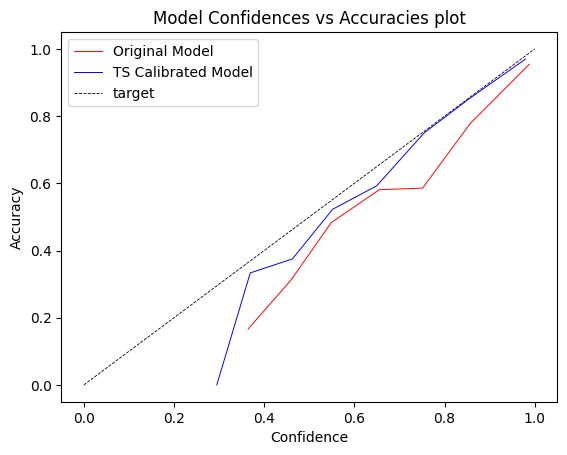

In [57]:
#Calculating values for the plot
#We will split into 10 equal width bins
NumBins = 10
#1
predictions_probs_arrays = model.predict(X_test[0:])
prediction_prob_of_max = predictions_probs_arrays.max(axis = 1, keepdims = False)
indices_for_each_Bm = [np.array(np.where((prediction_prob_of_max>i) & (prediction_prob_of_max<= i + (1/NumBins)))[0]) for i in (np.linspace(0,1,NumBins+1))[0:-1]]                  
labelType = (Y_test2 == model.predict(X_test).argmax(axis = 1, keepdims = True)).reshape(1,-1)[0]                      
label_type_for_each_Bm = [labelType[indices_for_each_Bm[count]] for count in range(0,NumBins,1)]                        
    #Calculate accuracy and confidence for each bin interval
accuracy_for_each_Bm = [label_type_for_each_Bm[count].mean() for count in range(0,NumBins,1)]  #acc(Bm)
confidence_for_each_Bm = [prediction_prob_of_max[indices_for_each_Bm[count]].mean() for count in range(0,NumBins,1)] #conf(Bm)
#Remove NaN values
acc_Bm_no_NaN1 = [val for val in accuracy_for_each_Bm if str(val) != 'nan']
conf_Bm_no_NaN1 = [val2 for val2 in confidence_for_each_Bm if str(val2) != 'nan']


#2
modelPredictX = calibrated_probs_x_test
Y = Y_test2
        
predictions_probs_arrays = modelPredictX                                               #All models predictions_probs, with probablitly/confidence array for each test sample
prediction_prob_of_max = predictions_probs_arrays.max(axis = 1, keepdims = False)                   # All confidences of model prediction on test set (on its predicted/max label)
    
#Calculating ECE by splitting into M equal width bins, e.g. could split into 10 bins, (0, 0.1],(0.1,0.2], ... (0.9,1]
indices_for_each_Bm = [np.array(np.where((prediction_prob_of_max>i) & (prediction_prob_of_max<= i + (1/NumBins)))[0]) for i in (np.linspace(0,1,NumBins+1))[0:-1]]   #-1 here?               #All indices for each confidence Bm interval from e.g. (0,0.1],(0.1,0.2], ..., (0.9,1] in here, each as its own list/array 
labelType = (Y == modelPredictX.argmax(axis = 1, keepdims = True)).reshape(1,-1)[0]                      #All correct label predicts by model. (Array of whether the model predicts correctly or incorrectly for all the X_test data samples)
label_type_for_each_Bm = [labelType[indices_for_each_Bm[count]] for count in range(0,NumBins,1)]                        #Whether the model was correct or incorrect for each sample now split by confidence Bm Interval

#Calculate accuracy and confidence for each bin interval
accuracy_for_each_Bm = [label_type_for_each_Bm[count].mean() for count in range(0,NumBins,1)]                  #Accuracy for each confidence Bm interval - acc(Bm)
confidence_for_each_Bm = [prediction_prob_of_max[indices_for_each_Bm[count]].mean() for count in range(0,NumBins,1)]                  # Avg confidence for each Bm confidence interval - conf(Bm)

#Remove NaN values
acc_Bm_no_NaN2 = [val for val in accuracy_for_each_Bm if str(val) != 'nan']
conf_Bm_no_NaN2 = [val2 for val2 in confidence_for_each_Bm if str(val2) != 'nan']

#Plot confidence of model vs accuracy of model
plt.plot(conf_Bm_no_NaN1, acc_Bm_no_NaN1, color = 'red', linewidth = 0.7)
plt.plot(conf_Bm_no_NaN2, acc_Bm_no_NaN2, color = 'blue', linewidth = 0.7)
plt.plot([0,1], [0,1], color ='black', linestyle = '--', zorder = 0, linewidth = 0.6) #[x0,x1], [y0,y1]
plt.title("Model Confidences vs Accuracies plot")
plt.legend(('Original Model', 'TS Calibrated Model', 'target'),loc=0)
plt.xlabel("Confidence")
plt.ylabel("Accuracy")



# My Notes

In [ ]:


#Temp





import torch
from torch import nn, optim
from torch.nn import functional as F


class ModelWithTemperature(nn.Module):
    """
    A thin decorator, which wraps a model with temperature scaling
    model (nn.Module):
        A classification neural network
        NB: Output of the neural network should be the classification logits,
            NOT the softmax (or log softmax)!
    """
    def __init__(self, model):
        super(ModelWithTemperature, self).__init__()
        self.model = model
        self.temperature = nn.Parameter(torch.ones(1) * 1.5)

    def forward(self, input):
        logits = self.model(input)
        return self.temperature_scale(logits)

    def temperature_scale(self, logits):
        """
        Perform temperature scaling on logits
        """
        # Expand temperature to match the size of logits
        temperature = self.temperature.unsqueeze(1).expand(logits.size(0), logits.size(1))
        return logits / temperature

    # This function probably should live outside of this class, but whatever
    def set_temperature(self, valid_loader):
        """
        Tune the tempearature of the model (using the validation set).
        We're going to set it to optimize NLL.
        valid_loader (DataLoader): validation set loader
        """
        self.cuda()
        nll_criterion = nn.CrossEntropyLoss().cuda()
        ece_criterion = _ECELoss().cuda()

        # First: collect all the logits and labels for the validation set
        logits_list = []
        labels_list = []
        with torch.no_grad():
            for input, label in valid_loader:
                input = input.cuda()
                logits = self.model(input)
                logits_list.append(logits)
                labels_list.append(label)
            logits = torch.cat(logits_list).cuda()
            labels = torch.cat(labels_list).cuda()

        # Calculate NLL and ECE before temperature scaling
        before_temperature_nll = nll_criterion(logits, labels).item()
        before_temperature_ece = ece_criterion(logits, labels).item()
        print('Before temperature - NLL: %.3f, ECE: %.3f' % (before_temperature_nll, before_temperature_ece))

        # Next: optimize the temperature w.r.t. NLL
        optimizer = optim.LBFGS([self.temperature], lr=0.01, max_iter=50)

        def eval():
            optimizer.zero_grad()
            loss = nll_criterion(self.temperature_scale(logits), labels)
            loss.backward()
            return loss
        optimizer.step(eval)

        # Calculate NLL and ECE after temperature scaling
        after_temperature_nll = nll_criterion(self.temperature_scale(logits), labels).item()
        after_temperature_ece = ece_criterion(self.temperature_scale(logits), labels).item()
        print('Optimal temperature: %.3f' % self.temperature.item())
        print('After temperature - NLL: %.3f, ECE: %.3f' % (after_temperature_nll, after_temperature_ece))

        return self


class _ECELoss(nn.Module):
    """
    Calculates the Expected Calibration Error of a model.
    (This isn't necessary for temperature scaling, just a cool metric).

    The input to this loss is the logits of a model, NOT the softmax scores.

    This divides the confidence outputs into equally-sized interval bins.
    In each bin, we compute the confidence gap:

    bin_gap = | avg_confidence_in_bin - accuracy_in_bin |

    We then return a weighted average of the gaps, based on the number
    of samples in each bin

    See: Naeini, Mahdi Pakdaman, Gregory F. Cooper, and Milos Hauskrecht.
    "Obtaining Well Calibrated Probabilities Using Bayesian Binning." AAAI.
    2015.
    """
    def __init__(self, n_bins=15):
        """
        n_bins (int): number of confidence interval bins
        """
        super(_ECELoss, self).__init__()
        bin_boundaries = torch.linspace(0, 1, n_bins + 1)
        self.bin_lowers = bin_boundaries[:-1]
        self.bin_uppers = bin_boundaries[1:]

    def forward(self, logits, labels):
        #softmaxes = F.softmax(logits, dim=1)
        temp1 = np.log(logits)
        softmaxes = tf.nn.softmax(temp1)
        softmaxes = torch.from_numpy(softmaxes.numpy())
        confidences, predictions = torch.max(softmaxes, 1)
        accuracies = predictions.eq(labels)
        ece = torch.zeros(1, device=logits.device)
        for bin_lower, bin_upper in zip(self.bin_lowers, self.bin_uppers):
            # Calculated |confidence - accuracy| in each bin
            in_bin = confidences.gt(bin_lower.item()) * confidences.le(bin_upper.item())
            prop_in_bin = in_bin.float().mean()
            if prop_in_bin.item() > 0:
                accuracy_in_bin = accuracies[in_bin].float().mean()
                avg_confidence_in_bin = confidences[in_bin].mean()
                ece += torch.abs(avg_confidence_in_bin - accuracy_in_bin) * prop_in_bin

        return ece

In [ ]:
#TEMP
#TEMP
#TEMP


def temp(T):
    NumBins = 10
    logits = np.log(model.predict(X_test2))
    calibrated_probs3 = temperature_scaling(logits, T)
    
    ECE3 = _ECELoss(NumBins) #DEFINE THIS OUTSIDE FUNCTION SINCE FUNCTION IS REPEATED
    label2222 = torch.from_numpy(Y_test2.reshape(1,-1)[0])
    ECE3updated = ECE3.forward(torch.from_numpy(calibrated_probs3.numpy()), label2222)
    print("ECE Using", NumBins, " bins and T = ", T, "is:", ECE3updated)
    return ECE3updated


#from scipy.optimize import minimize
#minimize(temp,1)

In [ ]:
#Temp
#For Testing




def tempfunc(numbins,A,B,C = None):
    if C != None:
        answer = C
    else:
        answer = A
    
    return answer

#tempanswer = tempfunc(10,np.array([[2,30],[5,10]]), np.array([2,3]), np.array([[2,30],[5,10]]))
#print(tempanswer)
#print(str(np.array([2,30])))

In [ ]:
type(np.array([[2,3],[3,4],[43,333],[43,43]])) == type(np.array([1]))
type(model.predict(X_validation))
type(-999)


testa = -999
def testfn1(T):
    answer = testa + T
    return answer

#trial = testfn1(1001)
#print(trial)